In [1]:
import numpy as np

from qiskit import QuantumCircuit, Aer
from qiskit.aqua import aqua_globals
from qiskit.compiler import transpile

from qore.model.mine import Mine
from qore.algorithms.asp import *

In [2]:
qmine = Mine('mine_config.txt')

In [3]:
qmine.plot_mine()

+---+--------+-------+-------+
|   |   0    |   1   |   2   |
+---+--------+-------+-------+
| 0 | -2.000 | 3.000 | 1.000 |
| 1 |  inf   | 5.000 |  inf  |
+---+--------+-------+-------+


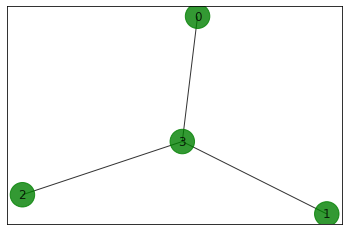

In [4]:
qmine.plot_mine_graph(color='g')

In [6]:
G, source, sink = qmine.build_pseudoflow_graph()

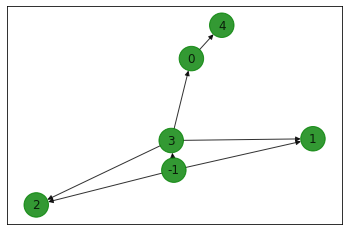

In [7]:
import networkx as nx
from networkx import Graph
import matplotlib.pyplot as plt

colors = ['g' for node in G.nodes()]
pos = nx.spring_layout(G)

default_axes = plt.axes(frameon=True)
nx.draw_networkx(G, node_color=colors, node_size=600,
                    alpha=.8, ax=default_axes, pos=pos)

In [8]:
import pseudoflow

In [12]:
ground_state = [value[0] for _, value in cuts.items()][1:-1]

In [13]:
ground_state

[1, 1, 1, 1]

In [4]:
H = qmine.gen_Hamiltonian(15.0)

In [5]:
T_list  = [1.0,2.0,5.0,10.0,15.0,20.0]
nt_list = [10*x for x in  range(2,21)] 
results = np.zeros((len(T_list),len(nt_list),2))

In [6]:
config = []
def construct(tmp):
    if len(tmp) == 4:
        config.append(''.join(tmp))
    else:
        construct(tmp+['1'])
        construct(tmp+['0'])
construct([])

In [7]:
for bitstring in config:
    qmine.plot_mine_state(bitstring)
    print(f"profit = {qmine.get_profit(bitstring)}")
    print(f"violation = {qmine.get_violation(bitstring)}")
    print()

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 1 | 1 |
| 1 | x | 1 | x |
+---+---+---+---+
profit = 7.0
violation = 0.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 1 | 1 |
| 1 | x | 0 | x |
+---+---+---+---+
profit = 2.0
violation = 0.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 1 | 0 |
| 1 | x | 1 | x |
+---+---+---+---+
profit = 6.0
violation = 1.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 1 | 0 |
| 1 | x | 0 | x |
+---+---+---+---+
profit = 1.0
violation = 0.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 0 | 1 |
| 1 | x | 1 | x |
+---+---+---+---+
profit = 4.0
violation = 1.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 0 | 1 |
| 1 | x | 0 | x |
+---+---+---+---+
profit = -1.0
violation = 0.0

+---+---+---+---+
|   | 0 | 1 | 2 |
+---+---+---+---+
| 0 | 1 | 0 | 0 |
| 1 | x | 1 | x |
+---+---+---+---+
profit = 3.0
violation = 2.0

+---+---+---+---+
|   | 0 | 1 | 2